In [14]:
# Importation of necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
from scipy.interpolate import interp1d
from math import log
# Loading the dataset for the city of Paris with pandas
df = pd.read_csv('paris.csv')

## Part 1 : Study of the Dataset

1) Delete all non-wind-related and time-related features from your dataset.

2) Extract a sub-dataset corresponding to exactly one year.

3) Plot the three wind-related features as a function of time spanning the whole year.

4) Calculate the number of hours during which the wind was not blowing.

5) Plot the monthly-averaged wind-related features as a function of the number of the month.

6) Plot the wind speed distribution at 10m and 100m above the ground.

7) Find the parameters of the Weibull distribution that seems to fit best your data.

8) Analyze the effect of the wind direction on turbine installation.

In [15]:
'''1.1 & 1.2'''

# We only keep only wind-related and time-related features for our study of the dataset
wind_and_time_features = ['period_end', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m']
df = df[wind_and_time_features]

# Conversion of 'period_end' column to datetime
df['period_end'] = pd.to_datetime(df['period_end'])

# Definition of a subset of the dataset for year 2023
df2023 = df.loc[df['period_end'].dt.year == 2023]

In [16]:
# Visualising the firt rows of the dataframe
df2023.head()

,period_end,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
157775,2023-01-01 00:00:00+00:00,7.7,12.9,214,217
157776,2023-01-01 00:30:00+00:00,7.5,12.6,215,218
157777,2023-01-01 01:00:00+00:00,7.4,12.3,216,218
157778,2023-01-01 01:30:00+00:00,7.1,11.9,216,219
157779,2023-01-01 02:00:00+00:00,6.7,11.5,217,219


* Plot of the wind speed at 10m above the ground in Paris in 2023

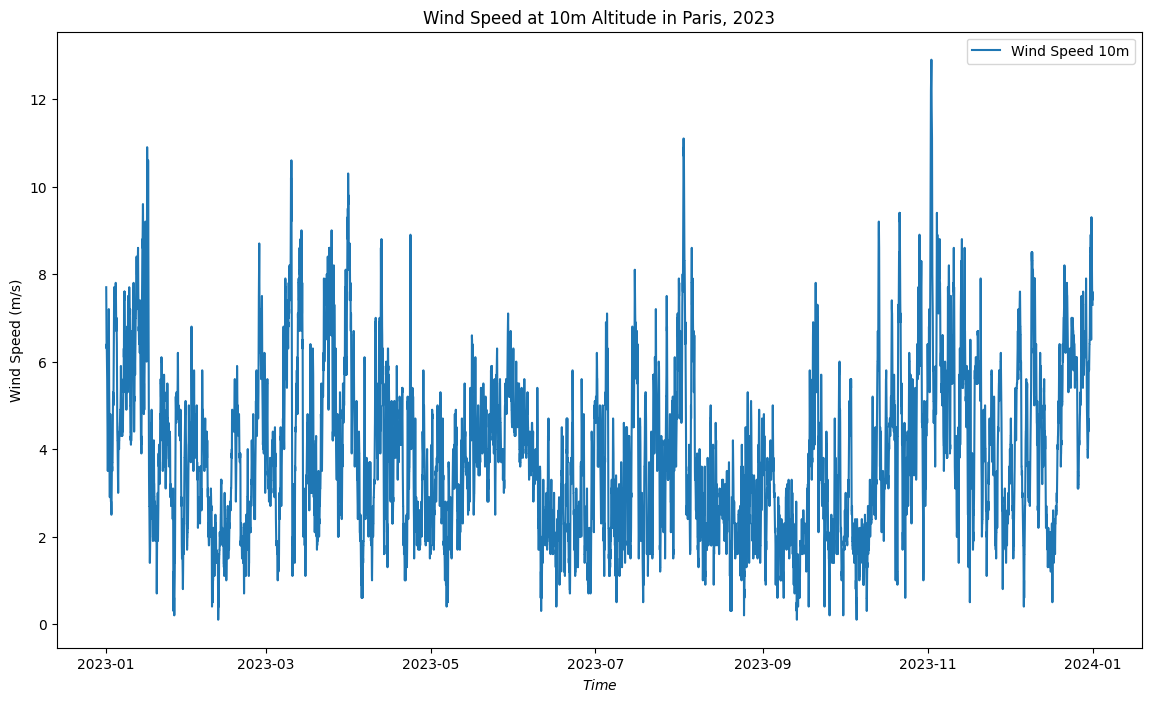

In [17]:
'''1.3'''

plt.figure(figsize=(14, 8))
plt.plot(df2023['period_end'], df2023['wind_speed_10m'], label='Wind Speed 10m')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('$Time$')
plt.title('Wind Speed at 10m Altitude in Paris, 2023')
plt.legend()
plt.show()

* Plot of the wind speed at 100m above the ground in Paris in 2022

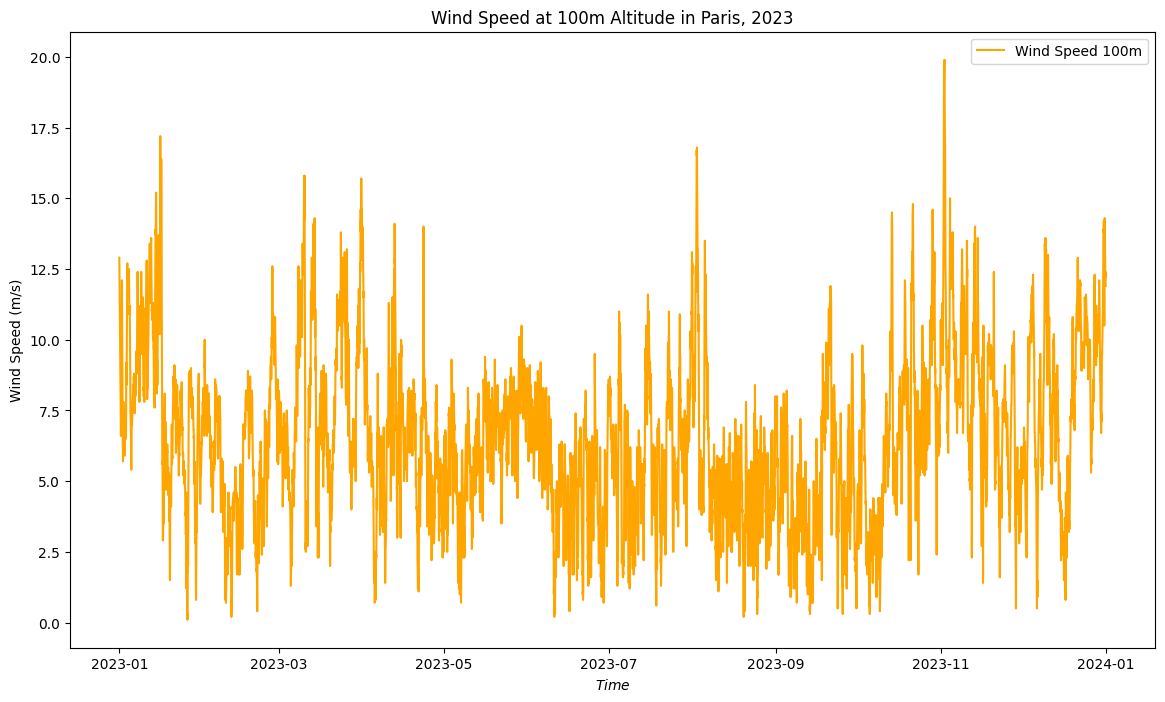

In [18]:
'''1.3'''

plt.figure(figsize=(14, 8))
plt.plot(df2023['period_end'], df2023['wind_speed_100m'], label='Wind Speed 100m', color='orange')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('$Time$')
plt.title('Wind Speed at 100m Altitude in Paris, 2023')
plt.legend()
plt.show()

* Plot of the wind direction at 10m above the ground in Paris in 2023

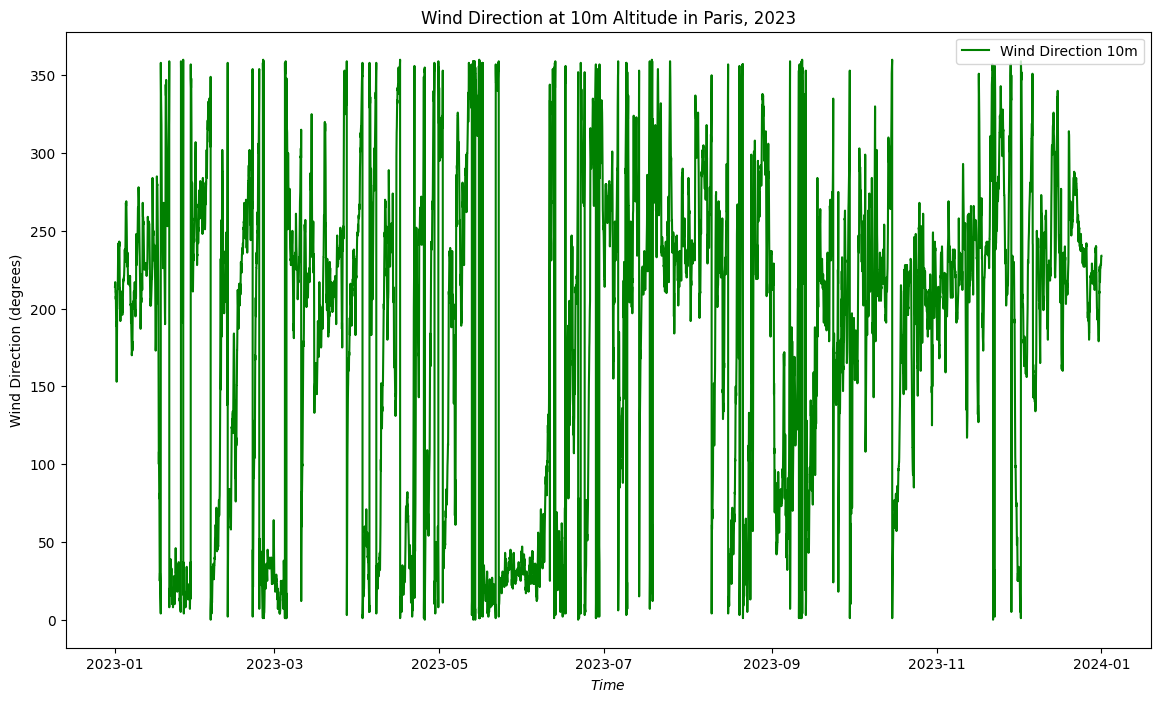

In [19]:
'''1.3'''

plt.figure(figsize=(14, 8))
plt.plot(df2023['period_end'], df2023['wind_direction_10m'], label='Wind Direction 10m', color='green')
plt.ylabel('Wind Direction (degrees)')
plt.xlabel('$Time$')
plt.title('Wind Direction at 10m Altitude in Paris, 2023')
plt.legend()
plt.show()

* Plot of the wind direction at 100m above the ground in Paris in 2023

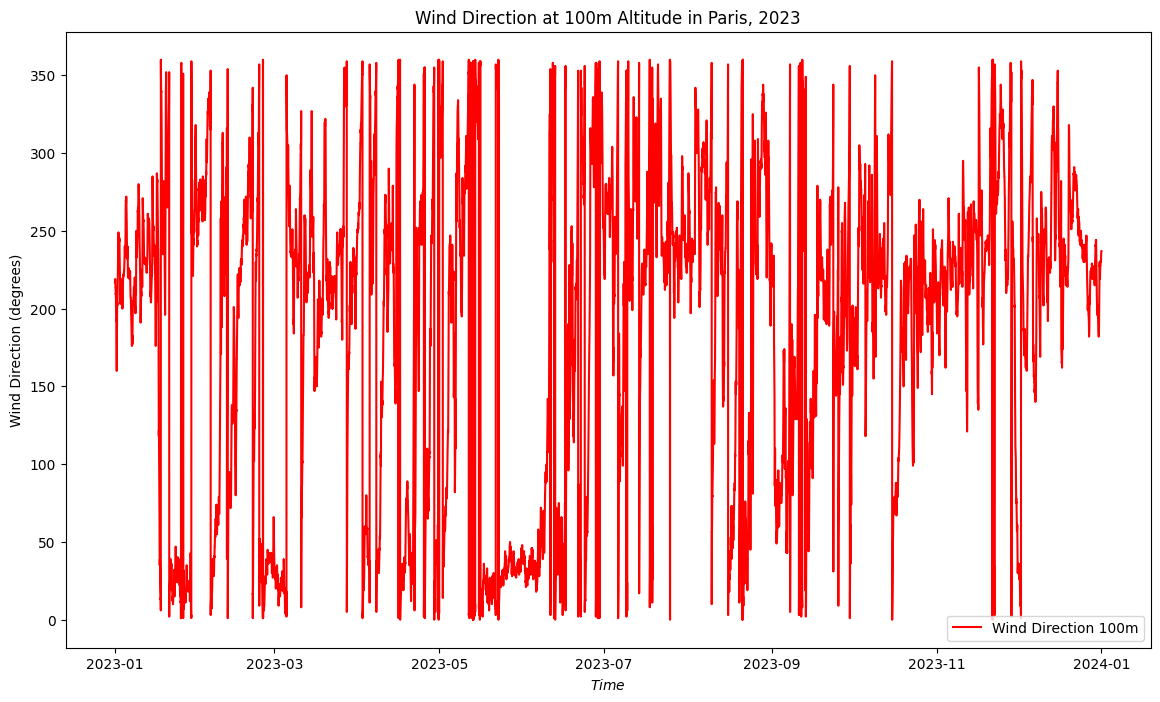

In [20]:
'''1.3'''

plt.figure(figsize=(14, 8))
plt.plot(df2023['period_end'], df2023['wind_direction_100m'], label='Wind Direction 100m', color='red')
plt.ylabel('Wind Direction (degrees)')
plt.xlabel('$Time$')
plt.title('Wind Direction at 100m Altitude in Paris, 2023')
plt.legend()
plt.show()

* We will plot together wind speed and direction at 10m and 100m Altitudes (maybe to visually observe patterns...)
* Indeed the curves are pretty similar

    - From the data we can assume that the height does not drastically impact the wind speed and wind direction.

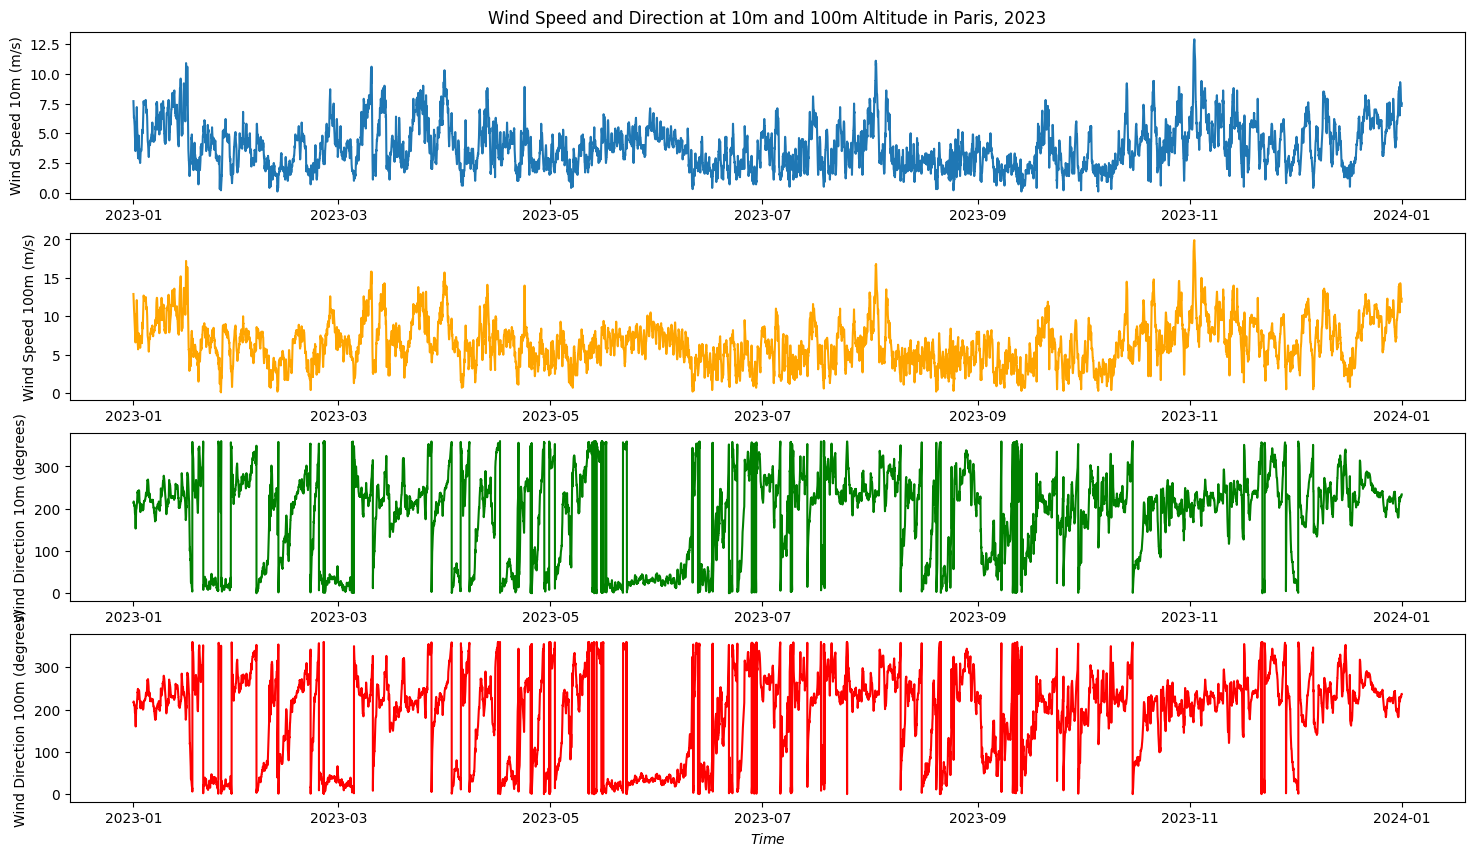

In [21]:
'''1.3'''

# Plot of the wind speed at 10m and 100m, and wind direction at 10m and 100m
plt.figure(figsize=(18, 10))
plt.subplot(411)
plt.title('Wind Speed and Direction at 10m and 100m Altitude in Paris, 2023')
plt.plot(df2023['period_end'], df2023['wind_speed_10m'], label='Wind Speed 10m')
plt.ylabel('Wind Speed 10m (m/s)')
plt.subplot(412)
plt.plot(df2023['period_end'], df2023['wind_speed_100m'], label='Wind Speed 100m', color='orange')
plt.ylabel('Wind Speed 100m (m/s)')
plt.subplot(413)
plt.plot(df2023['period_end'], df2023['wind_direction_10m'], label='Wind Direction 10m', color='green')
plt.ylabel('Wind Direction 10m (degrees)')
plt.subplot(414)
plt.plot(df2023['period_end'], df2023['wind_direction_100m'], label='Wind Direction 100m', color='red')
plt.ylabel('Wind Direction 100m (degrees)')
plt.xlabel('$Time$')
plt.show()

* Quick research on meteorological data and websites led me to set the threshold of wind blowing to 2m/s in average.

In [22]:
'''1.4'''

# We set the wind speed threshold (in m/s) by making the assumption that wind is not blowing below this velocity
wind_threshold = 2

# Calculate the number of hours during which the wind was not blowing
no_wind_hours_10m = ((df2023['wind_speed_10m'] < wind_threshold) & (df2023['wind_speed_10m'].notna())).sum()

# Same for the total number of hours in the dataset
total_hours = len(df2023)

# Calculate the percentage of time with no wind
no_wind_percentage_10m = (no_wind_hours_10m / total_hours) * 100

# Print the results
print(f"Number of hours with no wind at 10m in attitude : {no_wind_hours_10m}")
print(f"Total hours in the dataset: {total_hours}")
print(f"Percentage of time with no wind: {round(no_wind_percentage_10m, 2)}%")
print(f"Percentage of time with blowing wind : {100 - (round(no_wind_percentage_10m, 2))}%")


print()

'''We now do the same but for 100m above sea-level'''

# Now we calculate the number of hours during which the wind was not blowing
no_wind_hours_100m = ((df2023['wind_speed_100m'] < wind_threshold) & (df2023['wind_speed_100m'].notna())).sum()

# We compute the percentage of time with no wind
no_wind_percentage_100m = (no_wind_hours_100m / total_hours) * 100

# Print the results for 100m Altitude
print(f"Number of hours with no wind at 100m in atittude : {no_wind_hours_100m}")
print(f"Total hours in the dataset: {total_hours}")
print(f"Percentage of time with no wind: {round(no_wind_percentage_100m, 2)}%")
print(f"Percentage of time with blowing wind : {100 - (round(no_wind_percentage_100m, 2))}%")


Number of hours with no wind at 10m in attitude : 2610
Total hours in the dataset: 17520
Percentage of time with no wind: 14.9%
Percentage of time with blowing wind : 85.1%

Number of hours with no wind at 100m in atittude : 720
Total hours in the dataset: 17520
Percentage of time with no wind: 4.11%
Percentage of time with blowing wind : 95.89%


<ipython-input-23-8e8db4f778fb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['month'] = pd.DatetimeIndex(df2023['period_end']).month


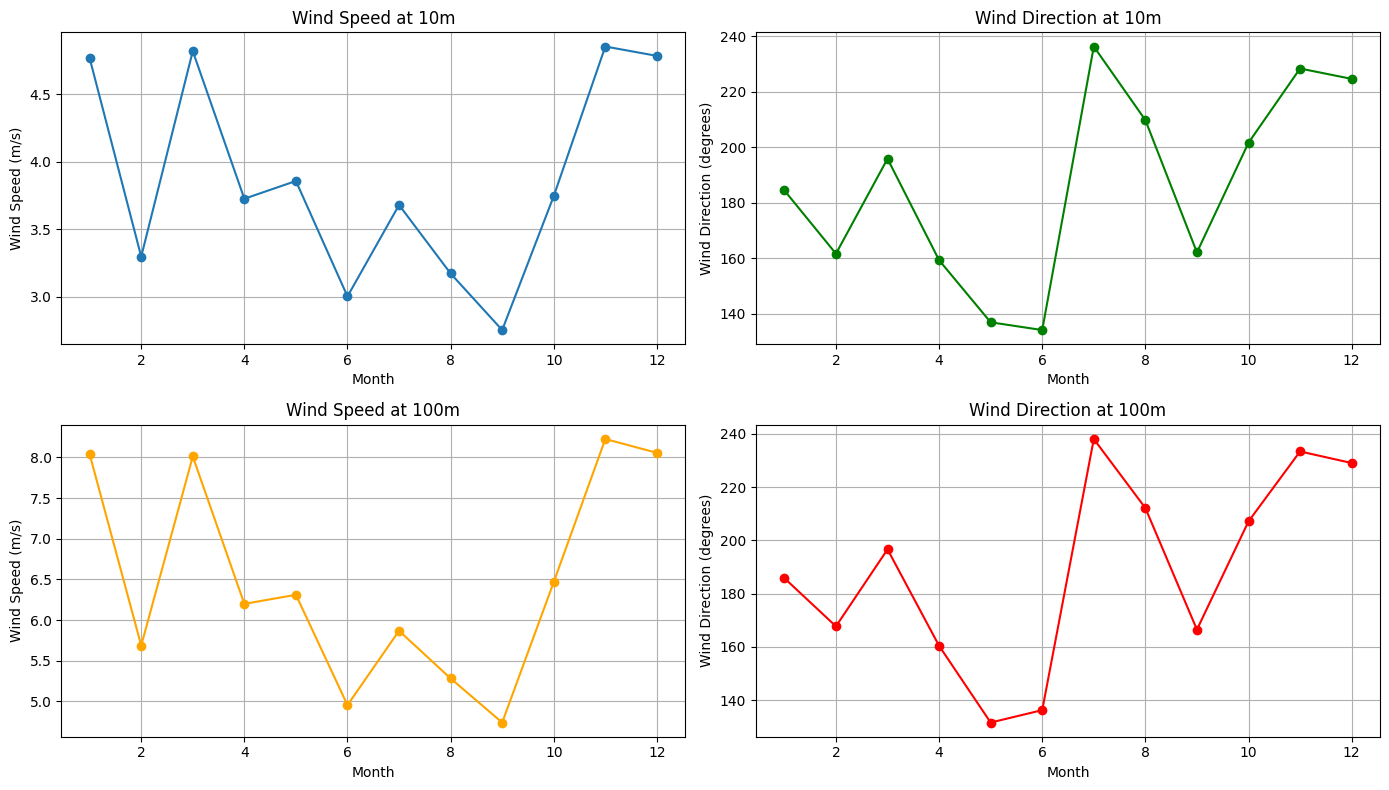

In [23]:
'''1.5'''

# We now plot the monthly-averaged wind-related features as a function of the number of the month

# We first extract the wind-related features
wind_speed_100m = df2023['wind_speed_100m']
wind_speed_10m = df2023['wind_speed_10m']
wind_direction_100m = df2023['wind_direction_100m']
wind_direction_10m = df2023['wind_direction_10m']

# Now we extract the month from the period column
df2023['month'] = pd.DatetimeIndex(df2023['period_end']).month

# Then we calculate the monthly average of the wind-related features
wind_speed_100m_monthly = wind_speed_100m.groupby(df2023['month']).mean().reset_index()
wind_speed_10m_monthly = wind_speed_10m.groupby(df2023['month']).mean().reset_index()
wind_direction_100m_monthly = wind_direction_100m.groupby(df2023['month']).mean().reset_index()
wind_direction_10m_monthly = wind_direction_10m.groupby(df2023['month']).mean().reset_index()

# Lastly we plot the monthly-averaged wind-related features
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 3)
plt.plot(wind_speed_100m_monthly['month'], wind_speed_100m_monthly['wind_speed_100m'], color='orange', marker='o')
plt.title('Wind Speed at 100m')
plt.xlabel('Month')
plt.grid(True)
plt.ylabel('Wind Speed (m/s)')

plt.subplot(2, 2, 1)
plt.plot(wind_speed_10m_monthly['month'], wind_speed_10m_monthly['wind_speed_10m'], marker='o')
plt.title('Wind Speed at 10m')
plt.xlabel('Month')
plt.grid(True)
plt.ylabel('Wind Speed (m/s)')

plt.subplot(2, 2, 4)
plt.plot(wind_direction_100m_monthly['month'], wind_direction_100m_monthly['wind_direction_100m'], color='red', marker='o')
plt.title('Wind Direction at 100m')
plt.xlabel('Month')
plt.grid(True)
plt.ylabel('Wind Direction (degrees)')

plt.subplot(2, 2, 2)
plt.plot(wind_direction_10m_monthly['month'], wind_direction_10m_monthly['wind_direction_10m'], color='green', marker='o')
plt.title('Wind Direction at 10m')
plt.xlabel('Month')
plt.grid(True)
plt.ylabel('Wind Direction (degrees)')

plt.tight_layout()
plt.show()

<ipython-input-24-990cb4ad881c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['month'] = df2023['period_end'].dt.month


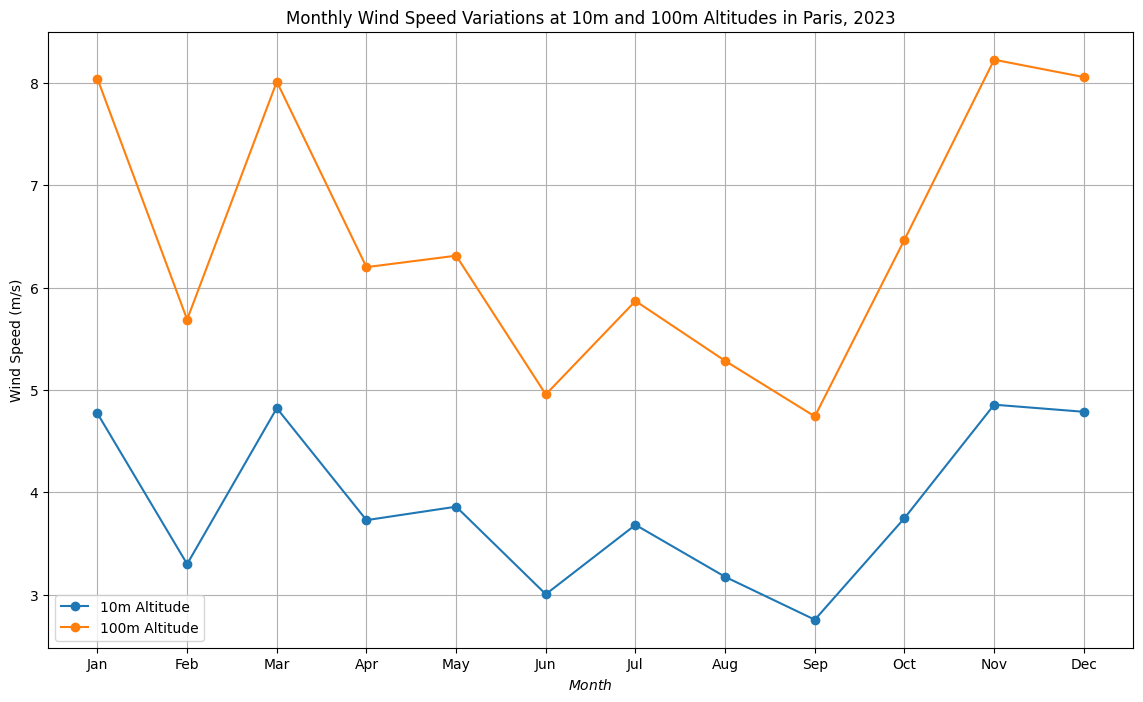

In [24]:
'''1.5'''

# Monthly averaged wind features
df2023['month'] = df2023['period_end'].dt.month
monthly_avg = df2023.groupby('month').mean()

# Plotting the Monthly Wind Speed Variations at 10m and 100m Altitudes in Paris, 2023.
plt.figure(figsize=(14, 8))
plt.title('Monthly Wind Speed Variations at 10m and 100m Altitudes in Paris, 2023')
plt.plot(monthly_avg.index, monthly_avg['wind_speed_10m'], label='10m Altitude', marker='o')
plt.plot(monthly_avg.index, monthly_avg['wind_speed_100m'], label='100m Altitude', marker='o')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('$Month$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Setting x-axis to month names for clarity.
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-25-2c25c2d8fe62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['month'] = df2023['period_end'].dt.month     # Extract month from 'period_end' datetime column.


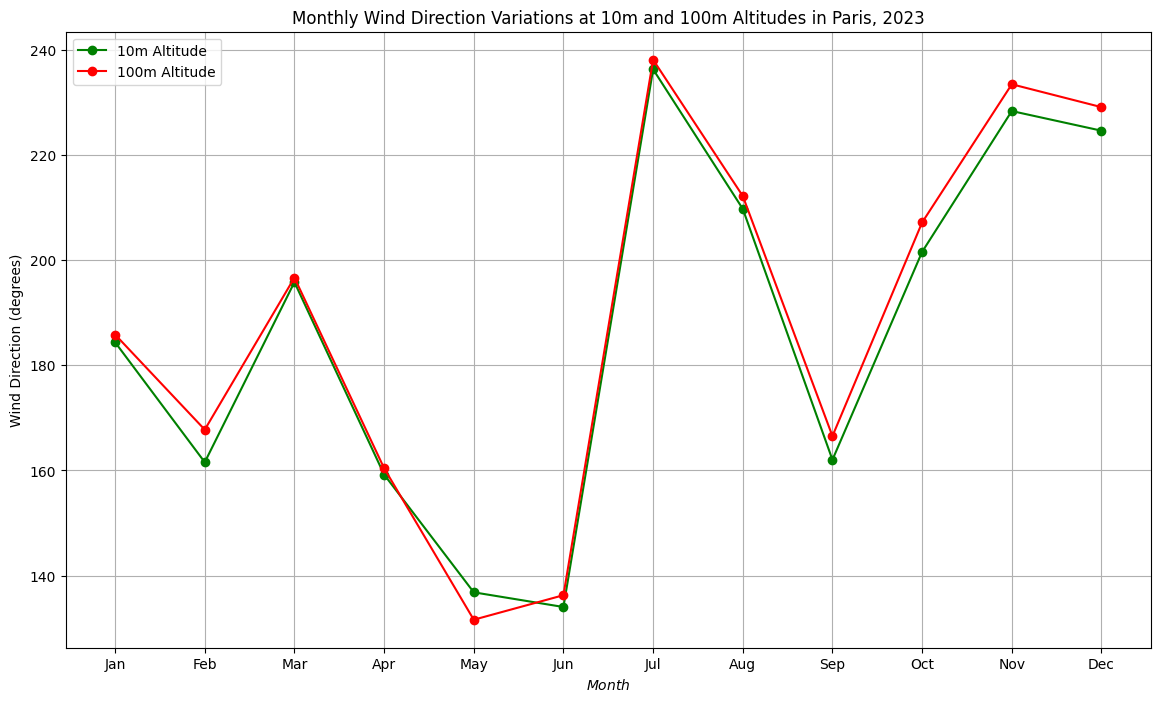

In [25]:
'''1.5'''

df2023['month'] = df2023['period_end'].dt.month     # Extract month from 'period_end' datetime column.
monthly_avg = df2023.groupby('month').mean()        # Calculate monthly averages.

plt.figure(figsize=(14, 8))
plt.title('Monthly Wind Direction Variations at 10m and 100m Altitudes in Paris, 2023')

# Plotting the average wind direction for 10m altitude.
plt.plot(monthly_avg.index, monthly_avg['wind_direction_10m'], label='10m Altitude', marker='o', color='green')
# Plotting the average wind direction for 100m altitude.
plt.plot(monthly_avg.index, monthly_avg['wind_direction_100m'], label='100m Altitude', marker='o', color='red')

plt.ylabel('Wind Direction (degrees)')
plt.xlabel('$Month$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.grid(True)

* Let's plot Wind speed distribution at 10m and 100m Altitude

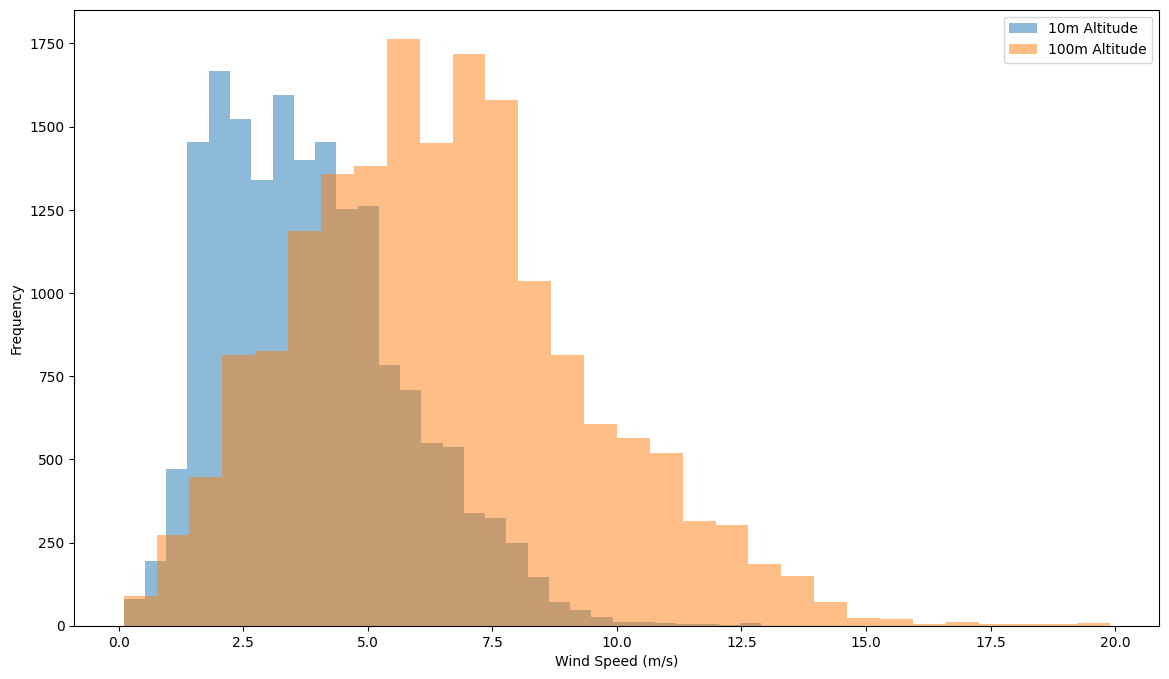

In [26]:
'''1.6'''

plt.figure(figsize=(14, 8))
plt.hist(df2023['wind_speed_10m'], bins=30, alpha=0.5, label='10m Altitude')
plt.hist(df2023['wind_speed_100m'], bins=30, alpha=0.5, label='100m Altitude')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

* Here we are looking for the parameters of the best-fitting Weibull Distribution for our data for both 10m and 100m altitude

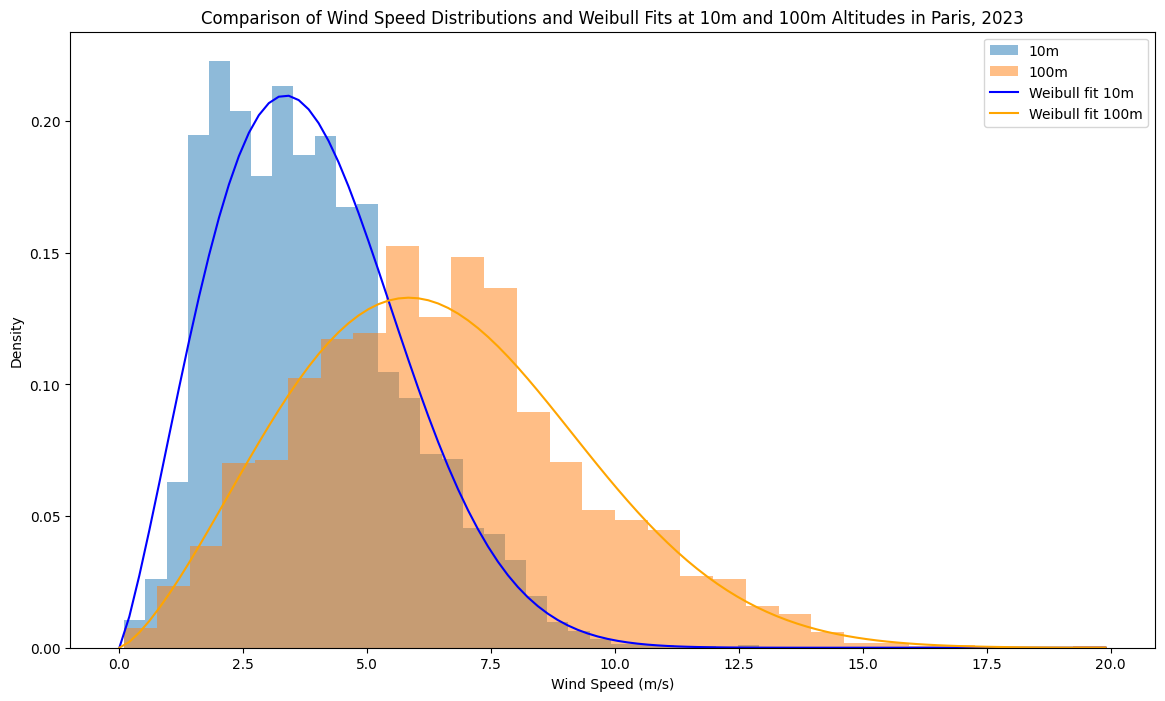

Weibull parameters at 10m altitude : Shape=2.217, Scale=4.392
Weibull parameters at 100m altitude : Shape=2.389, Scale=7.328


In [27]:
'''1.7'''

# Fitting Weibull distribution for wind speed at 10m altitude
shape_10m, loc_10m, scale_10m = weibull_min.fit(df2023['wind_speed_10m'], floc=0)        # we use the function weibull_min form the scipy.stats library
weibull_10m = weibull_min(shape_10m, loc_10m, scale_10m)

# Fitting Weibull distribution for wind speed at 100m altitude
shape_100m, loc_100m, scale_100m = weibull_min.fit(df2023['wind_speed_100m'], floc=0)
weibull_100m = weibull_min(shape_100m, loc_100m, scale_100m)

# Creating an appropriate grid for the plot
wind_speed_values = np.linspace(0, max(df2023['wind_speed_100m']), 100)

# Plotting of the histograms and the fitted Weibull distributions
plt.figure(figsize=(14, 8))
plt.hist(df2023['wind_speed_10m'], bins=30, alpha=0.5, label='10m', density=True)
plt.hist(df2023['wind_speed_100m'], bins=30, alpha=0.5, label='100m', density=True)
plt.plot(wind_speed_values, weibull_10m.pdf(wind_speed_values), label='Weibull fit 10m', color='blue')
plt.plot(wind_speed_values, weibull_100m.pdf(wind_speed_values), label='Weibull fit 100m', color='orange')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.legend()
plt.title('Comparison of Wind Speed Distributions and Weibull Fits at 10m and 100m Altitudes in Paris, 2023')
plt.show()

# Displaying the parameters of each distribution plotted
print(f"Weibull parameters at 10m altitude : Shape={round(shape_10m, 3)}, Scale={round(scale_10m, 3)}")
print(f"Weibull parameters at 100m altitude : Shape={round(shape_100m, 3)}, Scale={round(scale_100m, 3)}")


* Creation of scatter plots comparing Wind Speed and Wind Direction at 10m and 100m Altitude

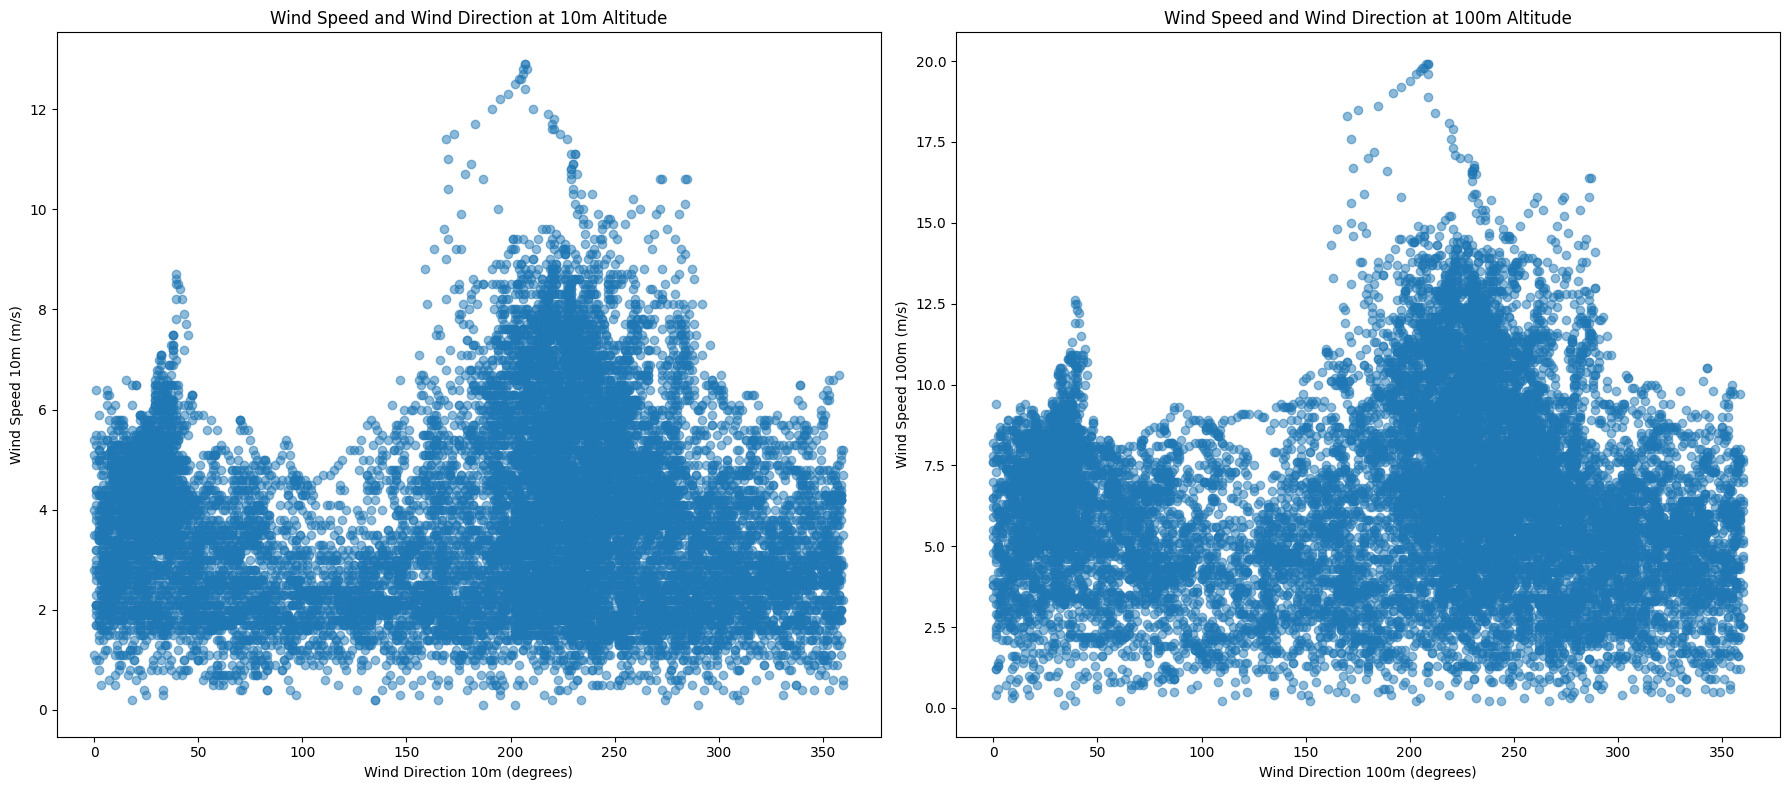

In [28]:
'''1.8'''

plt.figure(figsize=(18, 8))

# First subplot for wind direction and speed at 10 meters
plt.subplot(1, 2, 1)  # Define the second subplot (1 row, 2 columns, first plot).
plt.scatter(df2023['wind_direction_10m'], df2023['wind_speed_10m'], alpha=0.5)
plt.xlabel('Wind Direction 10m (degrees)')
plt.ylabel('Wind Speed 10m (m/s)')
plt.title('Wind Speed and Wind Direction at 10m Altitude')

# Second subplot for wind direction and speed at 100 meters
plt.subplot(1, 2, 2)  # Define the second subplot (1 row, 2 columns, second plot).
plt.scatter(df2023['wind_direction_100m'], df2023['wind_speed_100m'], alpha=0.5)
plt.xlabel('Wind Direction 100m (degrees)')
plt.ylabel('Wind Speed 100m (m/s)')
plt.title('Wind Speed and Wind Direction at 100m Altitude')

plt.tight_layout()
plt.show()

* This plot reveals some slight differences with elevation :

    * At 100m, wind speeds are a bit higher than at 10m, indicating increased wind activity higher above the ground due to reduced surface friction. The data shows however that wind behavior is not drastically impacted by height at this level of study.

As a matter of fact, our goal is to maximise the orthogonal exposure time between the wind direction and the wind turbine since it is the optimal configuration for electricity generation.

## Part 2 : Comparative study of wind turbine models

1) Find the height of the mast for each turbine model and add a feature to your dataframe containing the wind speed at this height according to the wind log profile formula.

2) Calculate the number of operating hours, the total power production in kWh/year, and the capacity factor with each wind turbine model.

3) Automate the pipeline of operations to be able to do it for any given year.

4) Plot the capacity factor as a function of the month and then as a function of the year.

In [29]:
print(df2023.shape)
df2023.head()

(17520, 6)


,period_end,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,month
157775,2023-01-01 00:00:00+00:00,7.7,12.9,214,217,1
157776,2023-01-01 00:30:00+00:00,7.5,12.6,215,218,1
157777,2023-01-01 01:00:00+00:00,7.4,12.3,216,218,1
157778,2023-01-01 01:30:00+00:00,7.1,11.9,216,219,1
157779,2023-01-01 02:00:00+00:00,6.7,11.5,217,219,1


In [30]:
print(df.shape)
df.index = range(1, len(df)+1)
df.head()

(175344, 5)


,period_end,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
1,2014-01-01 00:30:00+00:00,4.7,8.8,211,216
2,2014-01-01 01:00:00+00:00,4.5,8.7,210,216
3,2014-01-01 01:30:00+00:00,4.5,8.7,209,215
4,2014-01-01 02:00:00+00:00,4.6,8.8,207,213
5,2014-01-01 02:30:00+00:00,4.7,8.8,206,211


In [31]:
# Some quick preprocessing of columns and data types.

df['time'] = pd.to_datetime(df['period_end'])
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
del df['period_end']
df.head()

,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,time,month,year
1,4.7,8.8,211,216,2014-01-01 00:30:00+00:00,1,2014
2,4.5,8.7,210,216,2014-01-01 01:00:00+00:00,1,2014
3,4.5,8.7,209,215,2014-01-01 01:30:00+00:00,1,2014
4,4.6,8.8,207,213,2014-01-01 02:00:00+00:00,1,2014
5,4.7,8.8,206,211,2014-01-01 02:30:00+00:00,1,2014


In [32]:
'''2.1 & 2.2 & 2.3'''

# Turbine specifications
turbine_heights = {
    'Alstom_ECO122': 122,
    'Enercon_E33': 55,
    'Aventa_AV7': 35
}

# Power curves data
power_curves = {
    'Alstom_ECO122': {
        'wind_speed': list(range(1, 31)),
        'power': [0, 0, 29, 171, 389, 703, 1139, 1682, 2205, 2541, 2669, 2697, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 0, 0, 0, 0, 0]
    },
    'Enercon_E33': {
        'wind_speed': list(range(1, 31)),
        'power': [0, 0, 5, 13.7, 30, 55, 92, 138, 196, 250, 292.8, 320, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 0, 0, 0, 0, 0]
    },
    'Aventa_AV7': {
        'wind_speed': list(range(1, 31)),
        'power': [0, 0.1, 0.7, 1.5, 3.1, 5.8, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    }
}

# Maximum capacity of each turbine
turbine_capacity = {
     'Alstom_ECO122': 2700,
     'Enercon_E33': 335,
     'Aventa_AV7': 6.2
}

# Defining useful functions that will do the work of adding the features desired.

def calculate_wind_speed(df, turbine_heights):
    for name, height in turbine_heights.items():
        df[f'wind_speed_{name}'] = df['wind_speed_10m'] * (height / 10) ** 0.14
    return df

def calculate_power_output(df, power_curves):
    for turbine, curve in power_curves.items():
        power_dict = dict(zip(curve['wind_speed'], curve['power']))
        df[f'power_output_{turbine}'] = df[f'wind_speed_{turbine}'].apply(lambda x: power_dict.get(int(x), 0))
    return df

def calculate_monthly_capacity_factor(df, turbine_capacity):
    df['operating_hours'] = 0.5  # each record represents 0.5 hour
    df['month'] = df['time'].dt.month
    df['year'] = df['time'].dt.year

    for turbine in turbine_capacity.keys():
        # Calculate total monthly production
        monthly_data = df.groupby(['year', 'month'])[f'power_output_{turbine}'].sum().reset_index()
        monthly_data['monthly_hours'] = df.groupby(['year', 'month'])['operating_hours'].sum().values
        monthly_data['max_possible_production'] = turbine_capacity[turbine] * monthly_data['monthly_hours']
        monthly_data[f'capacity_factor_{turbine}'] = monthly_data[f'power_output_{turbine}'] * 0.5 / monthly_data['max_possible_production']

        # Merge back into the original dataframe
        df = df.merge(monthly_data[['year', 'month', f'capacity_factor_{turbine}']], on=['year', 'month'], how='left')

    return df

def process_wind_data(df, turbine_heights, power_curves, turbine_capacity):
    df = calculate_wind_speed(df, turbine_heights)
    df = calculate_power_output(df, power_curves)
    df = calculate_monthly_capacity_factor(df, turbine_capacity)
    return df

df_processed = process_wind_data(df, turbine_heights, power_curves, turbine_capacity)

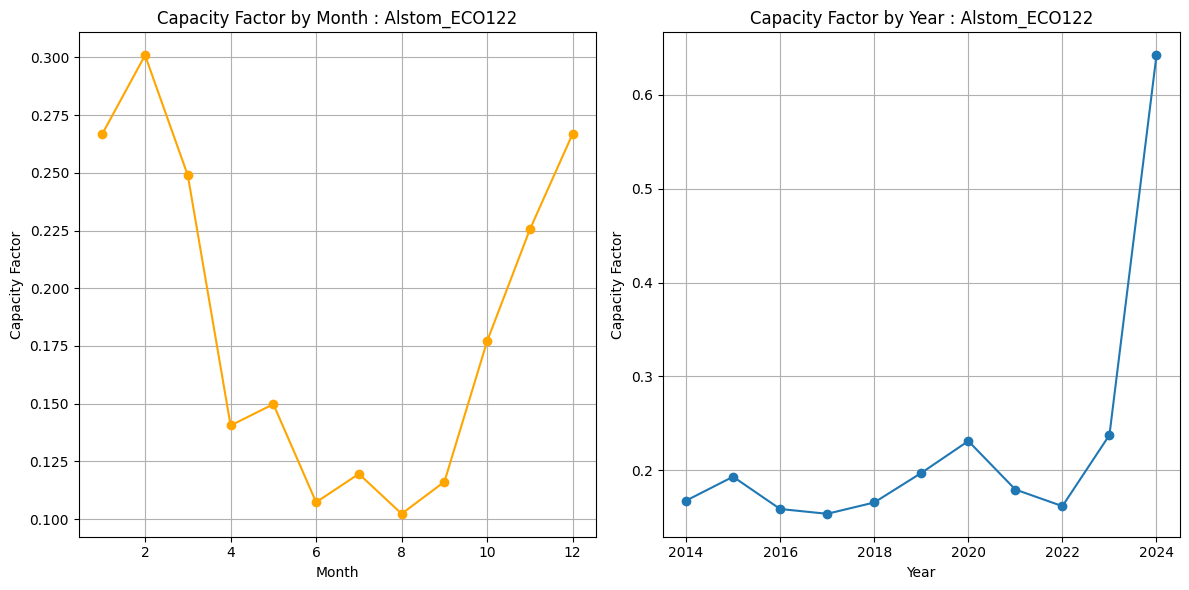

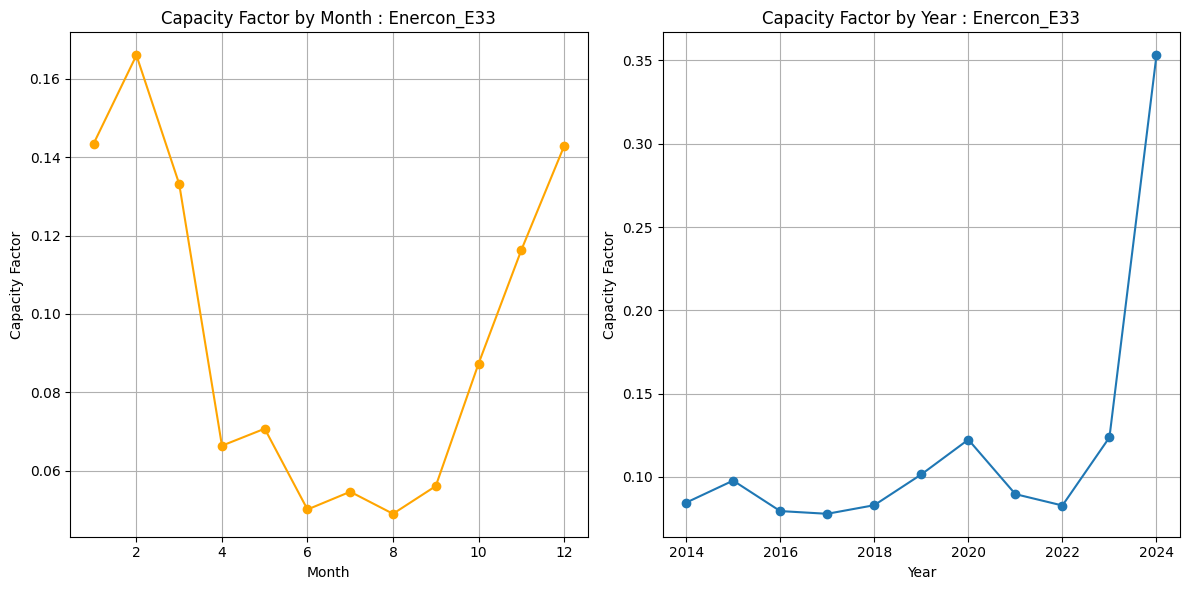

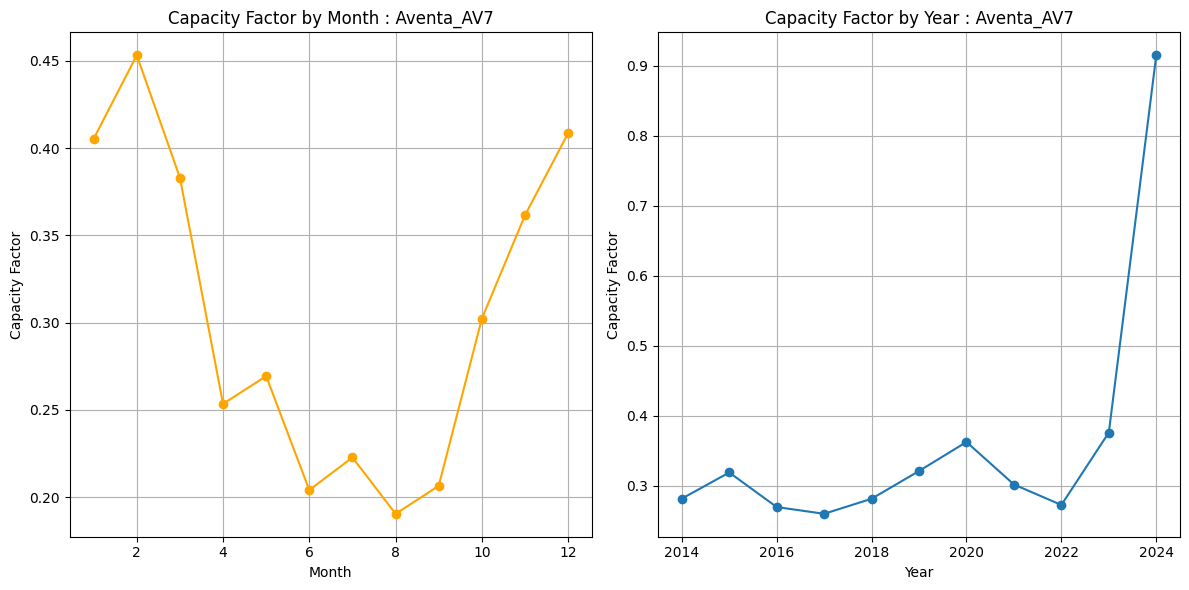

In [33]:
'''2.4'''

# Plotting capacity factors by month and year
def plot_capacity_factor(df, turbine):
    plt.figure(figsize=(12, 6))

    # Capacity factor by month
    monthly_capacity = df.groupby('month')[f'capacity_factor_{turbine}'].mean()
    plt.subplot(1, 2, 1)
    plt.plot(monthly_capacity.index, monthly_capacity.values, color='orange', marker='o')
    plt.title(f'Capacity Factor by Month : {turbine}')
    plt.xlabel('Month')
    plt.ylabel('Capacity Factor')
    plt.grid(True)

    # Capacity factor by year
    annual_capacity = df.groupby('year')[f'capacity_factor_{turbine}'].mean()
    plt.subplot(1, 2, 2)
    plt.plot(annual_capacity.index, annual_capacity.values, marker='o')
    plt.title(f'Capacity Factor by Year : {turbine}')
    plt.xlabel('Year')
    plt.ylabel('Capacity Factor')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Making the plot for the 3 wind turbines.
plot_capacity_factor(df_processed, 'Alstom_ECO122')
plot_capacity_factor(df_processed, 'Enercon_E33')
plot_capacity_factor(df_processed, 'Aventa_AV7')

# Part 3 : Case Study

* To achieve our goal, we will go throught the following steps :

1) Calculate Annual Production
2) Calculate Number of Turbines and Total Cost
3) Calculate Storage Capacity
4) Plotting results

In [34]:
df_processed.head()

,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,time,month,year,wind_speed_Alstom_ECO122,wind_speed_Enercon_E33,wind_speed_Aventa_AV7,power_output_Alstom_ECO122,power_output_Enercon_E33,power_output_Aventa_AV7,operating_hours,capacity_factor_Alstom_ECO122,capacity_factor_Enercon_E33,capacity_factor_Aventa_AV7
0,4.7,8.8,211,216,2014-01-01 00:30:00+00:00,1,2014,6.670958,5.966898,5.601023,703,30.0,3.1,0.5,0.309974,0.161207,0.475476
1,4.5,8.7,210,216,2014-01-01 01:00:00+00:00,1,2014,6.387088,5.712988,5.362682,703,30.0,3.1,0.5,0.309974,0.161207,0.475476
2,4.5,8.7,209,215,2014-01-01 01:30:00+00:00,1,2014,6.387088,5.712988,5.362682,703,30.0,3.1,0.5,0.309974,0.161207,0.475476
3,4.6,8.8,207,213,2014-01-01 02:00:00+00:00,1,2014,6.529023,5.839943,5.481853,703,30.0,3.1,0.5,0.309974,0.161207,0.475476
4,4.7,8.8,206,211,2014-01-01 02:30:00+00:00,1,2014,6.670958,5.966898,5.601023,703,30.0,3.1,0.5,0.309974,0.161207,0.475476


Annual Production per Turbine (kWh): {'Alstom_ECO122': 3975272.5, 'Enercon_E33': 252000.85454545452, 'Aventa_AV7': 15043.413636363635}
Number of Turbines Needed: {'Alstom_ECO122': 2214.0, 'Enercon_E33': 34921.0, 'Aventa_AV7': 584974.0}
Total Installation Cost (EUR): {'Alstom_ECO122': 6642000000.0, 'Enercon_E33': 34921000000.0, 'Aventa_AV7': 87746100000.0}
Required Storage Capacity (kWh): 143292.0


<ipython-input-35-8c2f83fb120d>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turbines, y=[turbines_needed[t] for t in turbines], palette="viridis")


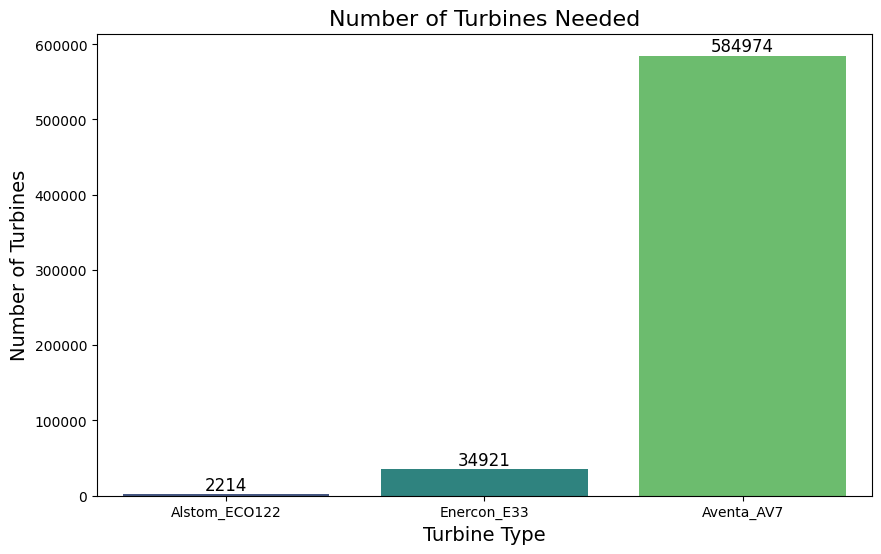

<ipython-input-35-8c2f83fb120d>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turbines, y=[total_cost[t] for t in turbines], palette="magma")


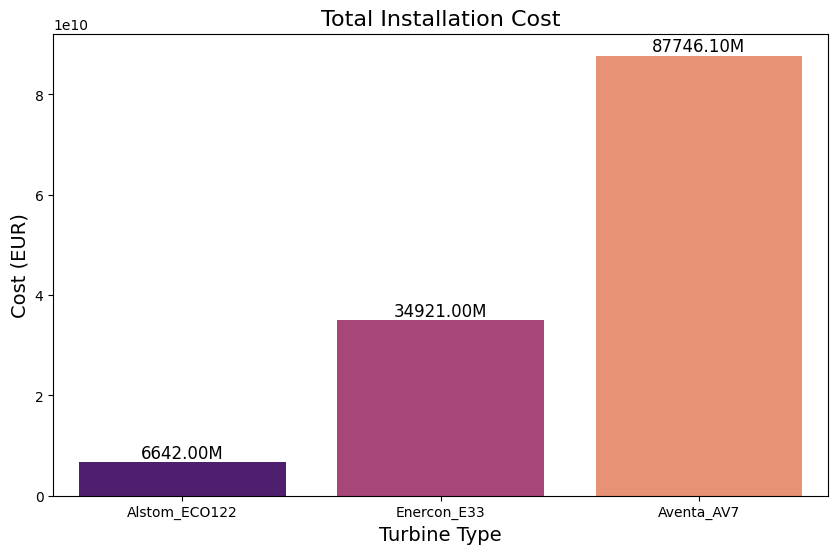

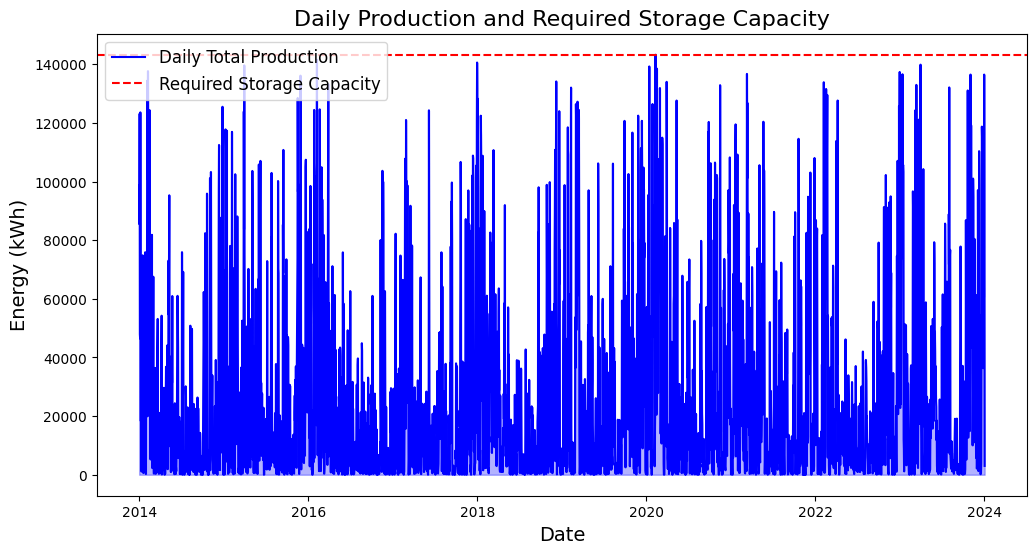

In [35]:
# Population and average consumption data
population = 2200000                        # Corresponds to the Paris population
average_consumption_per_person = 4000       # kWh per person per year

# Total annual electricity consumption for the town
total_consumption = population * average_consumption_per_person  # in kWh

# Calculate the total annual production for each type of turbine
def calculate_annual_production(df, turbine_capacity):
    annual_production = {}
    for turbine, capacity in turbine_capacity.items():
        annual_production[turbine] = df.groupby('year')[f'power_output_{turbine}'].sum().mean() * 0.5  # kWh
    return annual_production

# Costs of the 3 turbines in EUR
turbine_costs = {
    'Alstom_ECO122': 3000000,
    'Enercon_E33': 1000000,
    'Aventa_AV7': 150000
}

# Calculate the number of turbines needed and total cost
def calculate_turbines_needed(total_consumption, annual_production, turbine_costs):
    turbines_needed = {}
    total_cost = {}
    for turbine, production in annual_production.items():
        turbines_needed[turbine] = np.ceil(total_consumption / production)
        total_cost[turbine] = turbines_needed[turbine] * turbine_costs[turbine]
    return turbines_needed, total_cost

# Maximum capacity of each turbine
turbine_capacity = {
     'Alstom_ECO122': 2700,
     'Enercon_E33': 335,
     'Aventa_AV7': 6.2
}

# Calculate the number of turbines needed and total cost
def calculate_turbines_needed(total_consumption, annual_production, turbine_costs):
    turbines_needed = {}
    total_cost = {}
    for turbine, production in annual_production.items():
        turbines_needed[turbine] = np.ceil(total_consumption / production)
        total_cost[turbine] = turbines_needed[turbine] * turbine_costs[turbine]
    return turbines_needed, total_cost

# Calculate storage capacity needed (simplified model)
def calculate_storage_capacity(df):
    df['date'] = df['time'].dt.date
    daily_production = df.groupby('date').agg({
        'power_output_Alstom_ECO122': 'sum',
        'power_output_Enercon_E33': 'sum',
        'power_output_Aventa_AV7': 'sum'
    })
    max_daily_production = daily_production.max().sum()  # Maximum daily production across all turbines
    min_daily_production = daily_production.min().sum()  # Minimum daily production across all turbines

    # Assume storage needed is the difference between max and min daily production
    storage_capacity_needed = max_daily_production - min_daily_production
    return storage_capacity_needed

# Get the annual production for each turbine
annual_production = calculate_annual_production(df_processed, turbine_capacity)

# Get the number of turbines needed and total cost
turbines_needed, total_cost = calculate_turbines_needed(total_consumption, annual_production, turbine_costs)

# Calculate the required storage capacity
storage_capacity_needed = calculate_storage_capacity(df_processed)

# Plotting the results
def plot_turbines_needed(turbines_needed):
    turbines = list(turbines_needed.keys())

    plt.figure(figsize=(10, 6))
    sns.barplot(x=turbines, y=[turbines_needed[t] for t in turbines], palette="viridis")
    plt.title('Number of Turbines Needed', fontsize=16)
    plt.ylabel('Number of Turbines', fontsize=14)
    plt.xlabel('Turbine Type', fontsize=14)
    for i, v in enumerate([turbines_needed[t] for t in turbines]):
        plt.text(i, v + 0.1, str(int(v)), ha='center', va='bottom', fontsize=12)
    plt.show()

def plot_total_cost(total_cost):
    turbines = list(total_cost.keys())

    plt.figure(figsize=(10, 6))
    sns.barplot(x=turbines, y=[total_cost[t] for t in turbines], palette="magma")
    plt.title('Total Installation Cost', fontsize=16)
    plt.ylabel('Cost (EUR)', fontsize=14)
    plt.xlabel('Turbine Type', fontsize=14)
    for i, v in enumerate([total_cost[t] for t in turbines]):
        plt.text(i, v + 1000000, f'{v/1e6:.2f}M', ha='center', va='bottom', fontsize=12)
    plt.show()

def plot_storage_capacity(daily_total_production, storage_capacity_needed):
    plt.figure(figsize=(12, 6))
    plt.plot(daily_total_production.index, daily_total_production.values, label='Daily Total Production', color='blue')
    plt.fill_between(daily_total_production.index, daily_total_production.values, color='blue', alpha=0.3)
    plt.axhline(y=storage_capacity_needed, color='red', linestyle='--', label='Required Storage Capacity')
    plt.title('Daily Production and Required Storage Capacity', fontsize=16)
    plt.ylabel('Energy (kWh)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend(fontsize=12)
    plt.show()

# Print results for final analysis
print("Annual Production per Turbine (kWh):", annual_production)
print("Number of Turbines Needed:", turbines_needed)
print("Total Installation Cost (EUR):", total_cost)
print("Required Storage Capacity (kWh):", storage_capacity_needed)

# Plot the results separately
plot_turbines_needed(turbines_needed)
plot_total_cost(total_cost)

# Prepare data for storage capacity plot
df_processed['date'] = df_processed['time'].dt.date
daily_production = df_processed.groupby('date').agg({
    'power_output_Alstom_ECO122': 'sum',
    'power_output_Enercon_E33': 'sum',
    'power_output_Aventa_AV7': 'sum'
})
daily_total_production = daily_production.sum(axis=1)

plot_storage_capacity(daily_total_production, storage_capacity_needed)

## Results

1. Annual Production per Turbine:

From the calculations, we have determined the average annual power output for each type of wind turbine based on the processed data. This gives us insight into the efficiency and productivity of each turbine type under the given wind conditions.

2. Number of Turbines Needed:

We calculated the number of turbines needed to meet the total electricity consumption of the town. This calculation was based on the total annual electricity consumption of the population and the annual production per turbine. The results highlight the scalability of each turbine type in meeting the town's energy needs.

3. Total Installation Cost:

The total cost of installing the required number of turbines for each type was computed. This analysis is crucial for budget planning and financial feasibility studies. It provides a clear comparison of the investment required for different turbine options.

4. Required Storage Capacity:

We estimated the storage capacity needed to handle periods without wind. This is based on the difference between the maximum and minimum daily production. Understanding the storage requirements is vital for ensuring a reliable energy supply during periods of low wind activity.

* Visualizations :

1. Number of Turbines Needed:

The bar plot for the number of turbines needed shows that different turbine types vary significantly in the number of units required to meet the same energy demand. This visual helps in understanding the spatial and logistical implications of installing each type of turbine.

2. Total Installation Cost:

The bar plot for the total installation cost provides a direct comparison of the financial investment required for each turbine type. This is useful for decision-makers to evaluate cost-effectiveness and budget constraints.

3. Daily Production and Required Storage Capacity:

The line plot of daily production with the required storage capacity highlighted illustrates the variability in daily energy production and the need for storage solutions. This visualization underscores the importance of energy storage in maintaining a stable energy supply.

## Conclusion

Based on the analysis:

1. Turbine Selection:

* Alstom ECO122 : This turbine has a high annual production, requiring fewer units to meet the town's energy demand.
However, the high initial cost per unit might be a limiting factor.

* Enercon E33: This turbine strikes a balance between production and cost, making it a viable option if budget constraints are significant.

* Aventa AV7: While this turbine has the lowest cost per unit, it requires a substantially higher number of units to meet the energy demand due to its lower production capacity.

2. Cost and Feasibility:

Considering the total installation cost, Enercon E33 appears to be the most cost-effective solution.
It requires a moderate number of units and a manageable financial investment. However, if space is a limiting factor, Alstom ECO122 might be preferable despite the higher cost.

3. Storage Capacity:

The variability in daily production necessitates a robust storage solution.
The calculated storage capacity provides a baseline for the required energy storage infrastructure to ensure continuous power supply during periods of low wind.